<a href="https://colab.research.google.com/github/Muhammad-kaif2/Seabron/blob/main/solve_of_Task_Session_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

### `Q-1:` Using Gapminder Data
1. Create a scatter plot of 'gdpPercap' against 'lifeExp' for the year 2007, with the size of the markers determined by 'pop' and the color determined by 'continent'.

In [ ]:
import plotly.express as px
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


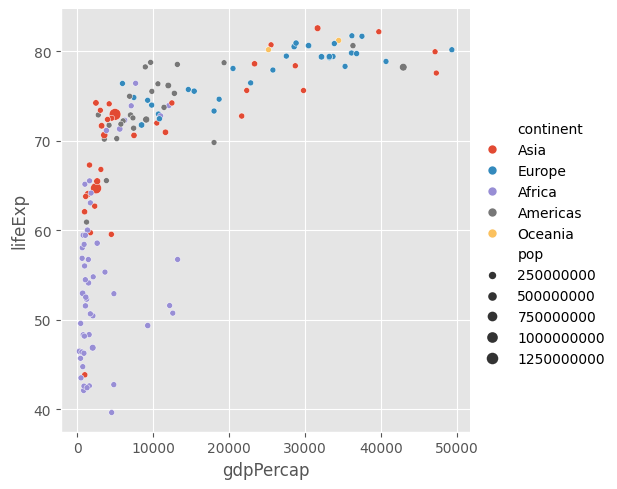

In [ ]:
# Your Code here
df_2007 = df[df['year'] == 2007]
df_2007.head()
sns.relplot(data = df_2007,kind="scatter",y="lifeExp",x="gdpPercap",hue="continent",size="pop")

### `Q-2-3:` Using `flights` dataset of seaborn.

2. Using the "flights" dataset that comes with seaborn, create a heatmap that shows the average number of passengers per month for each year.

3. Using the seaborn's flight dataset, create a clustermap to visualize the relationship between the number of passengers, months, and year.


In [ ]:
df = sns.load_dataset('flights')
df.shape
df.tail()


,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


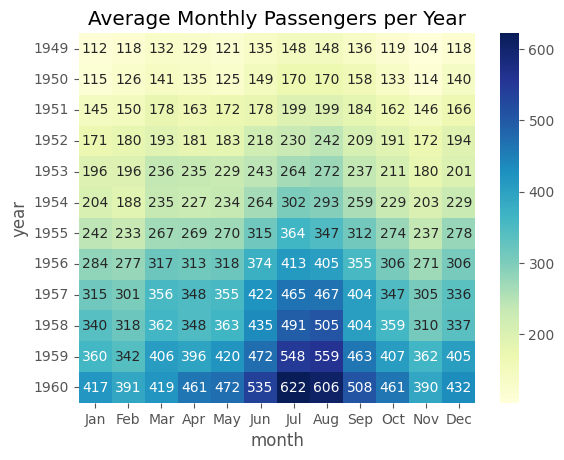

In [ ]:
# Start coding
pivot_data = df.pivot(index="year", columns="month", values="passengers")

sns.heatmap(pivot_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Average Monthly Passengers per Year")
plt.show()


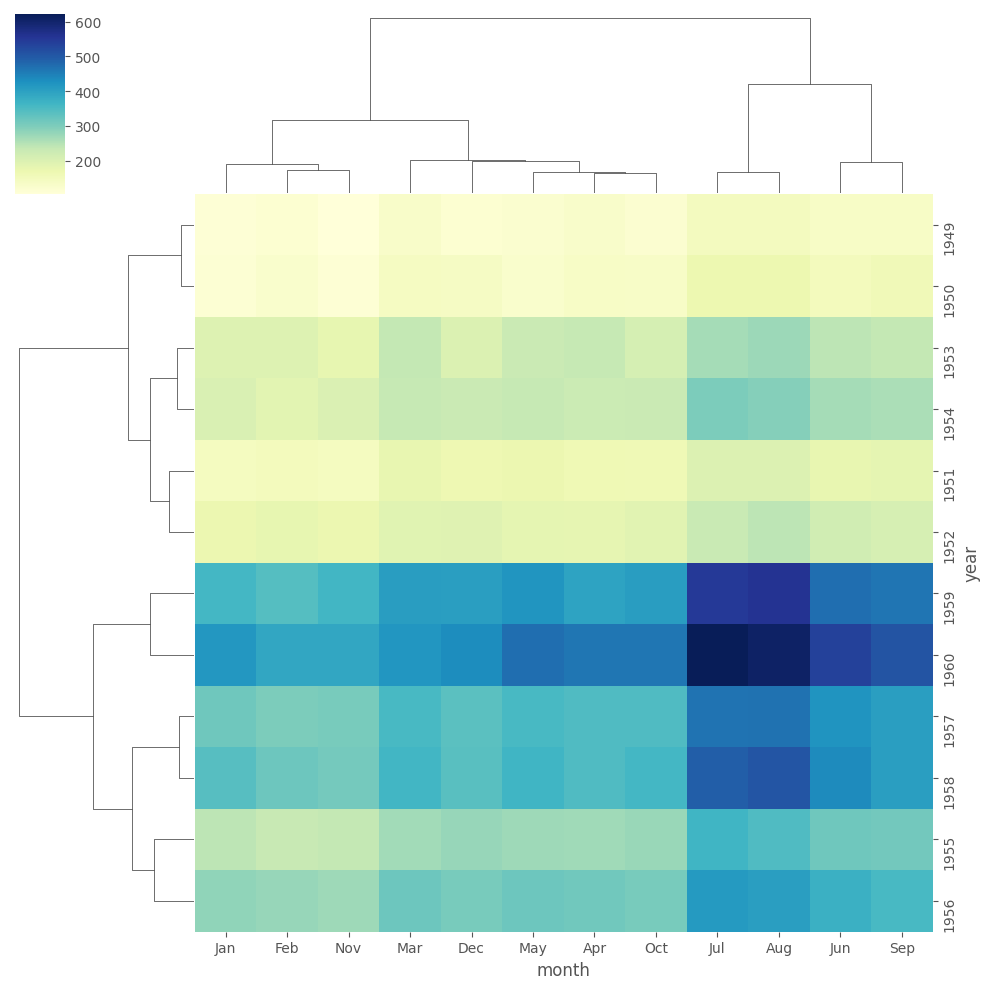

In [ ]:
sns.clustermap(pivot_data, cmap="YlGnBu")
plt.show()

## For questions 4-8:

For these qestions, an insurance dataset is used. You can get details from [here](https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health). And if you want this dataset to use directly, then you can use this link: **https://docs.google.com/spreadsheets/d/e/2PACX-1vQVpcVtdYdZU4zU4-lqxt-iPHkyndDWs_aqEDUu9ZodlJ48Dku0PFgdXlj2N5RCmwXJrNtZLsI_wEVf/pub?gid=220677750&single=true&output=csv**

### **`Q-4:`** Draw a scatter plot based on the below conditions:
1. x-axis should be "age" and y-axis should be "bmi".
2. For hue, size and style parameters use "diabetic", "gender" and "smoker" column respectively.
3. Add title to your chart.
4. Age should be less than 70 percentiles.
5. BMI should be greater than the average value of the filtered age dataset.

In [5]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQVpcVtdYdZU4zU4-lqxt-iPHkyndDWs_aqEDUu9ZodlJ48Dku0PFgdXlj2N5RCmwXJrNtZLsI_wEVf/pub?gid=220677750&single=true&output=csv')
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


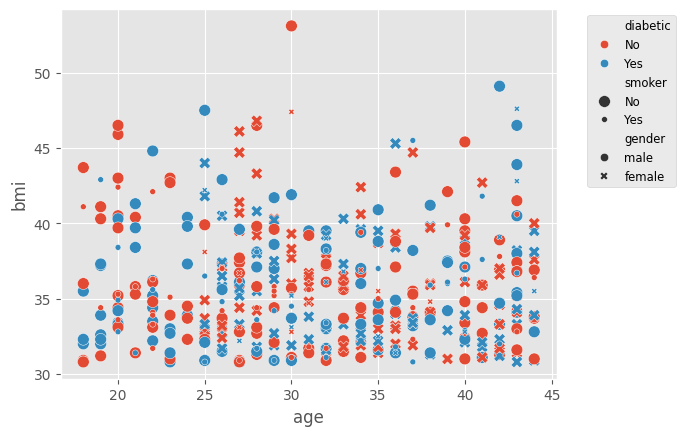

In [ ]:
# This is your place to try on
df_filtered = df[df['age'] < df['age'].quantile(0.7)]
avg_bmi = df_filtered['bmi'].mean()
df_filtered = df_filtered[df_filtered['bmi'] > avg_bmi]
sns.scatterplot(data=df_filtered, x='age', y="bmi", hue='diabetic',style="gender",size="smoker")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')


### **`Q-5:`** Draw a line plot by using the below informations

1. bloodpressure vs children
2. Blood-pressure values should be between 90 and 100. The upper and lower limit are included.
3. Show the details of "smoker".

<Axes: xlabel='children', ylabel='bloodpressure'>

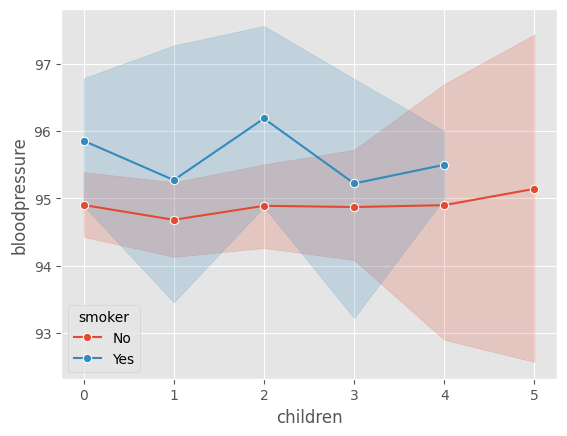

In [ ]:
# Code here
df_blvschi = df[df["bloodpressure"].between(90,100)]
sns.lineplot(data=df_blvschi,x="children",y="bloodpressure",hue="smoker",marker="o")

### **`Q-6:`** Draw a histogram using displot

- based on "age" column.
- Show details of "smoker" (hue).
- Create 2 separate charts for the above 2 conditions based on "gender" side-by-side.

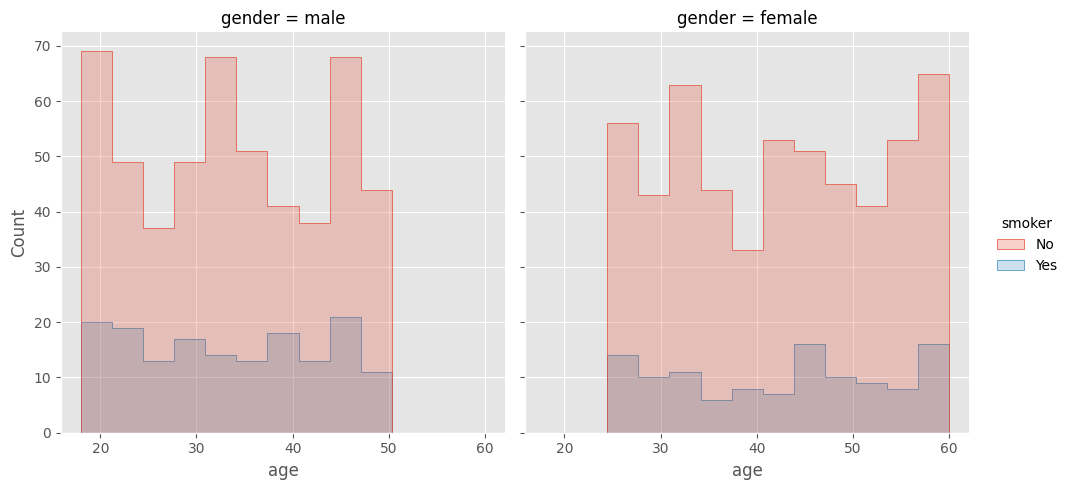

In [11]:
# code here
sns.displot(data=df,x="age", hue="smoker",col="gender", element="step")

### **`Q-7:`** Draw a kde plot between "age" and "bloodpressure".

<Axes: xlabel='age', ylabel='bloodpressure'>

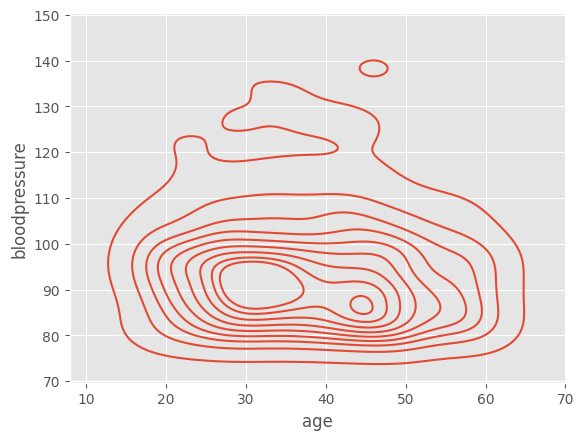

In [12]:
# code here
sns.kdeplot(data=df,x="age",y="bloodpressure")


### **`Q-8:`** Draw a clustermap between between "age", "bmi" and "bloodpressure".

<Figure size 500x500 with 0 Axes>

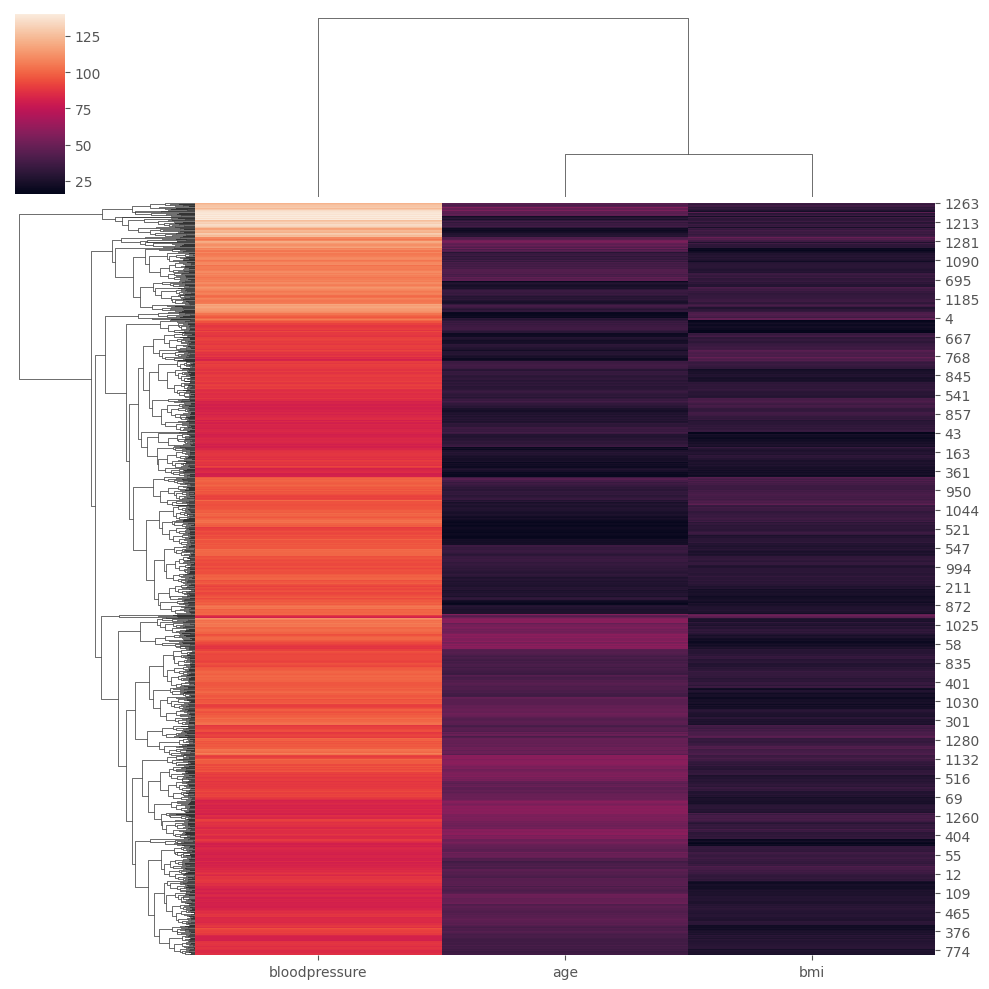

<Figure size 500x500 with 0 Axes>

In [25]:
# code here
# sns.clustermap(df[["age","bmi","bloodpressure"]])
ka = df.iloc[:,[2,4,5]].dropna().reset_index(drop=True)
sns.clustermap(ka)
plt.figure(figsize=(5,5))